# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist

The idea of histogram equalization is that the pixels should be distributed evenly over the whole intensity range, i.e. the aim is to transform the image so that the output image has a flat histogram ⇒ Contrast Enhancement ==> the contrast increases and the details of the dark regions appear clearly

In [2]:
from commonfunctions import *
# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

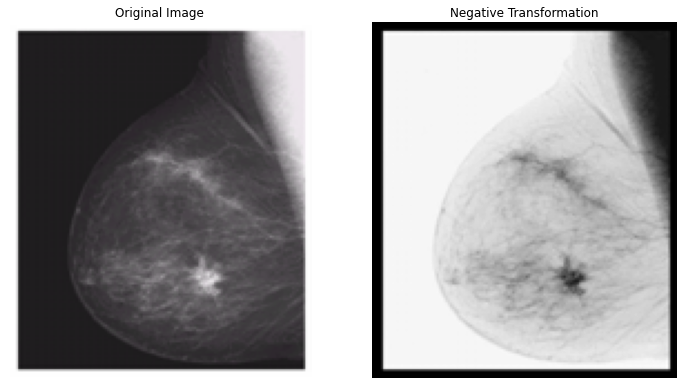

In [3]:
'''
1
Negative Transformation
'''

'''
Define function ‘Negative’ that apply Negative transformation 
for any image and any threshold. What is the equation??? s = T(r) = L - 1 - r
'''
def negative(img, L):
    grayscale_img = rgb2gray(img)
    
    '''
    height, width = grayscale_img.shape
    for i in range(0, height):
        for j in range(0, width):
            grayscale_img[i, j] = L - 1 - grayscale_img[i, j]
    '''
    
    '''
    rows, cols, _ = img.shape
    neg_img = np.copy(img)
    for i in range(0, rows):
        for j in range(0, cols):
            pixel = neg_img[i, j]
            
            pixel[0] = L - 1  - pixel[0]
            pixel[1] = L - 1  - pixel[1]
            pixel[2] = L - 1  - pixel[2]
            
            neg_img[i, j] = pixel
    '''
                
    return L - 1 - grayscale_img

# Read image ‘Picture1.png’
img = io.imread('imgs/Picture1.png')
# Call the function and apply it on the image ‘Picture1.png’
neg_img = negative(img, 256)
# Display the image beforeand after transformation in the same figure.
show_images([img, neg_img], ['Original Image', 'Negative Transformation'])

1.0


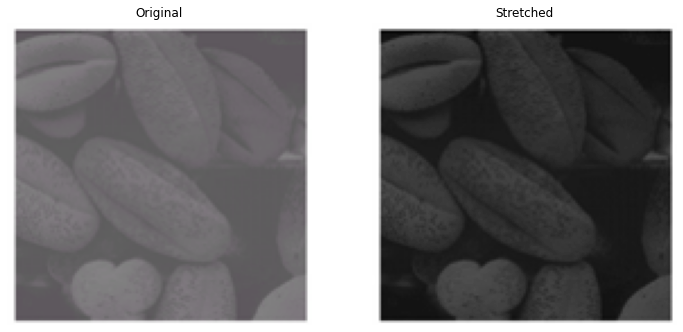

In [5]:
'''
2
Contrast Enhancement
'''

'''
Define function ‘Contrast_enhancement’ that Stretches the grey levels 
in the range 0 to 100 into the range 50 –200 and leaves other levels non changed. 
'''
def contrast_enhancement(img):
    '''
    Goal: Increase the dynamic range of the gray levels for low contrast images
    What is the equation??? Linear line equation: y = ax + b OR y-y1 = ((y2-y1)/(x2-x1))(x-x1)
    y = 1.5x + 50
    '''
    grayscale = rgb2gray(img)
    '''
    # Using for loops
    rows, cols = grayscale.shape
    for i in range(rows):
        for j in range(cols):
            r = grayscale[i, j]
            if r <= 100: # same as r >= 0 and r <= 100 ==> No negative values.
                grayscale[i, j] = 1.5*r+50
    '''
    
    # Using matrix conditional indexing which is faster 
    # Src: https://numpy.org/doc/stable/reference/generated/numpy.where.html
    # Src: https://stackoverflow.com/questions/33168775/conditional-indexing-with-numpy-ndarray
    grayscale = np.where(grayscale <= 100, 1.5*grayscale+50, grayscale)
    
    return grayscale

# Read image ‘Picture2.png’
img = io.imread('imgs/Picture2.png')
# Call the function and apply it on the image ‘Picture2.png’
stretched_img = contrast_enhancement(img)
# Display the image before and after transformation in the same figure
show_images([img, stretched_img], ['Original', 'Stretched'])

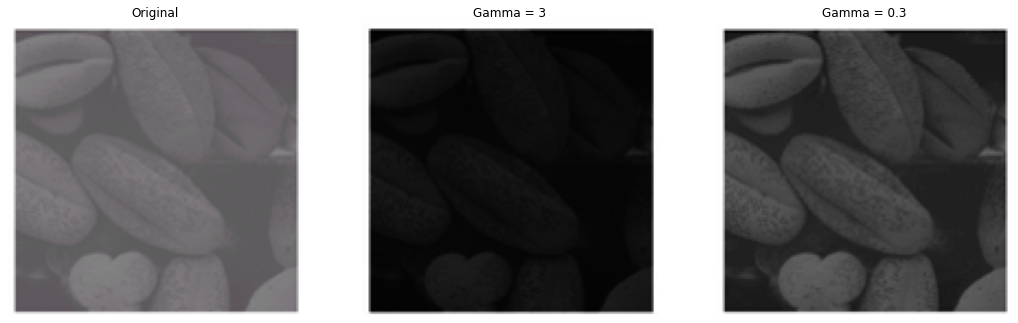

There is an inverse propostional between Gamma and the brightness of the image
Higher Gamma => Darker Image
Lower Gamma => Lighter Image
For enhancing images for different types of display devices => For example Gamma of CRT 
lies in between of 1.8 to 2.5, that means the image displayed on CRT is dark


In [4]:
'''
3
Gamma Correction
'''

'''
Define function ‘Gamma_Correction’ that Stretches the grey levels according to the gamma equation. (𝐴′=𝑐∗𝐴𝛾)
'''
def gamma_correction(img, c, gamma):
    grayscale = rgb2gray(img)
    grayscale = c*(grayscale**gamma)
    return grayscale

# Read image ‘Picture2.png
img = io.imread('imgs/Picture2.png')
# Call the function with  𝑐=1 and 𝛾=3and 𝑐=1 and 𝛾=0.5
gamma1 = gamma_correction(img, 1, 3)
gamma2 = gamma_correction(img, 1, 0.5)
# Display the images before and after transformation in the same figure
show_images([img, gamma1, gamma2], ['Original', 'Gamma = 3', 'Gamma = 0.3'])
# What is the effect of decreasing 𝛾?
print('There is an inverse propostional between Gamma and the brightness of the image\nHigher Gamma => Darker Image\nLower Gamma => Lighter Image')
print('For enhancing images for different types of display devices => For example Gamma of CRT \nlies in between of 1.8 to 2.5, that means the image displayed on CRT is dark')

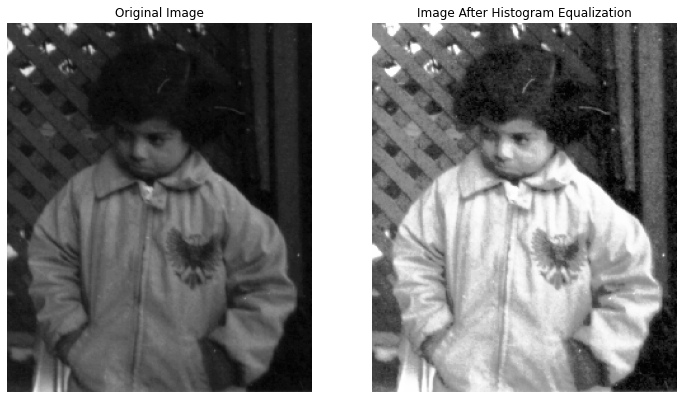

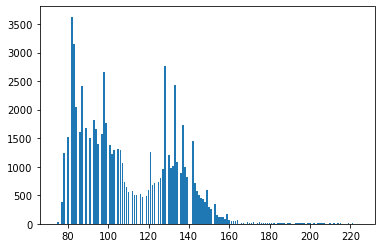

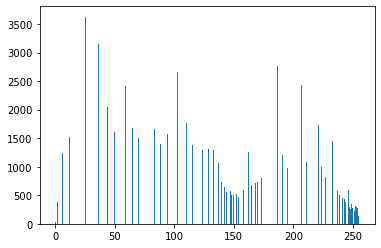

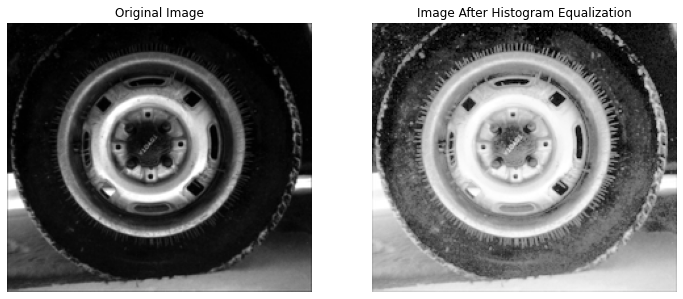

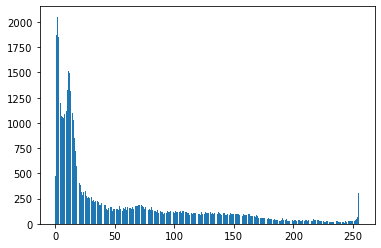

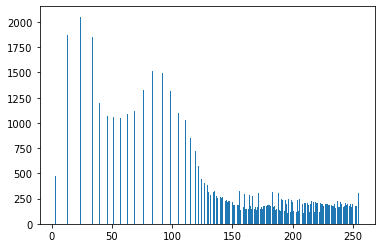

In [78]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
def getImageWithHist(name,ext,nbins=256):
    pass

def equalize_hist(img, nbins=256):
    grayscale = rgb2gray(np.copy(img))
    N, M = grayscale.shape
    size = N*M
    
    
    # Using loops
    hist = np.zeros(256)
    for i in range(N):
        for j in range(M):
            hist[grayscale[i][j]] += 1
    
    for i in range(1, len(hist)):
        hist[i] += hist[i-1]
        
    for i in range(N):
        for j in range(M):
            grayscale[i][j] = round(255*hist[grayscale[i][j]]/size)
    return grayscale
    '''
    hist, bins = np.histogram(grayscale.flatten(),nbins, [0, nbins])
    cumm_hist = np.cumsum(hist)
    eq_hist = 255*cumm_hist/size
    return eq_hist.reshape(grayscale.shape)
    '''
    
def equalize(image_path, nbins):
    img = io.imread(image_path)
    img_hist = equalize_hist(img, nbins)
    show_images([img,img_hist], ['Original Image', 'Image After Histogram Equalization'])
    showHist(img)
    showHist(img_hist)

equalize('imgs/pout.tif', 256)
equalize('imgs/tire.tif', 256)


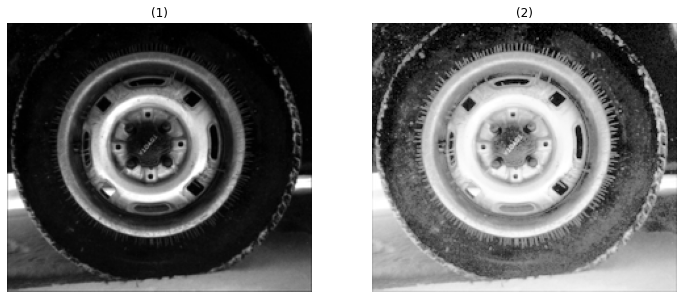

In [69]:
from skimage.exposure import equalize_hist as eqhist
img = io.imread('imgs/tire.tif')
img_hist = eqhist(img, 256)
show_images([img, img_hist])

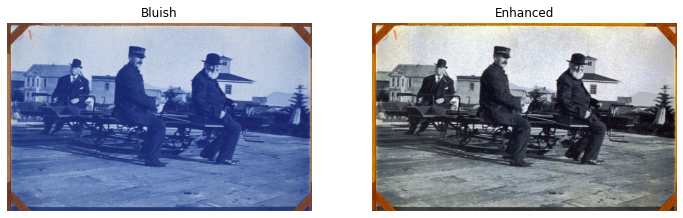

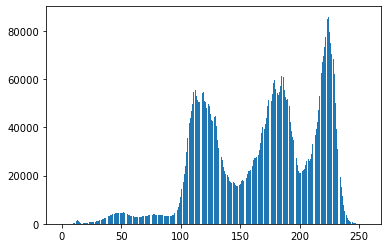

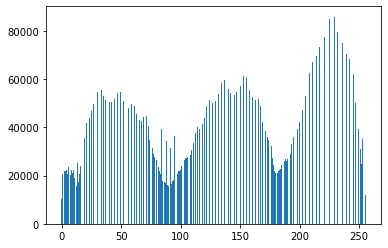

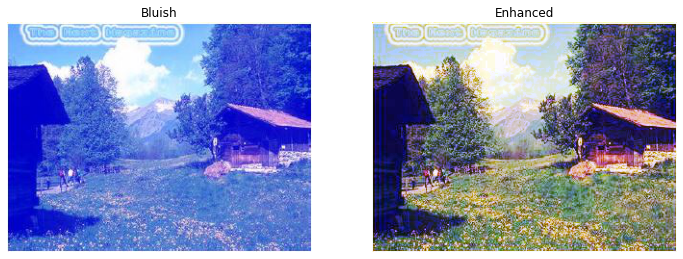

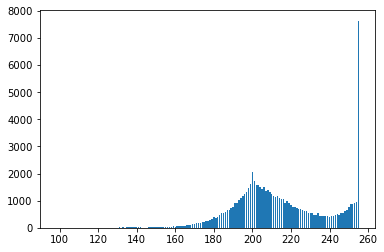

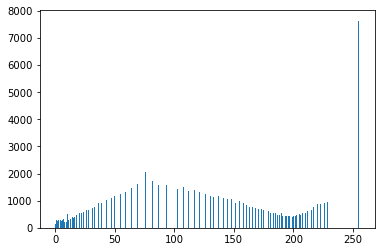

In [93]:
'''
Histogram Equalizatio:
effectively spreading out the most frequent intensity values, 
i.e. stretching out the intensity range of the image
'''

def enhance_bluish(img):
    enhanced = np.copy(img)
    enhanced[:, :, 2] = equalize_hist(enhanced[:, :, 2], 256)
    enhanced[:, :, 1] = equalize_hist(enhanced[:, :, 1], 256)
    enhanced[:, :, 0] = equalize_hist(enhanced[:, :, 0], 256)
    return enhanced

img = io.imread('1.jpg')
enhanced = enhance_bluish(img)
show_images([img, enhanced], ['Bluish', 'Enhanced'])
showHist(img[:, :, 2])
showHist(enhanced[:, :, 2])

img = io.imread('2.jpg')
enhanced = enhance_bluish(img)
show_images([img, enhanced], ['Bluish', 'Enhanced'])
showHist(img[:, :, 2])
showHist(enhanced[:, :, 2])